<a href="https://colab.research.google.com/github/SafaaFathii/Numerical-Optimization-GD/blob/main/notebooks/Mini_and_Stochastic_Using_MultiVariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MiniBatch MultiVariate

In [ ]:
df = pd.read_csv("MultipleLR.csv",names = ["X1","X2","X3","Y"])
df.head()

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True , drop=True)
df.head()

,X1,X2,X3,Y
0,96,93,95,192
1,69,70,73,141
2,78,83,85,175
3,53,46,55,101
4,79,70,88,164


In [ ]:
len(df)//2

12

In [ ]:
def MiniBatch_Gradient_Descent(df,alpha):
    thetas = np.array([0,0,0,0],dtype=np.float64)
    df.insert(loc = 0,column = "X0",value = 1)
    predictors= list(df.iloc[:,:4].columns)
    CostList = []
    CostPrev = 0
    batchSize = len(df)//2
    end = False
    for i in range(200):
      for j in range(0,df.shape[0],batchSize):
        df.loc[j:j+batchSize-1,"Y_Predict"] = df.loc[j:j+batchSize-1,predictors].dot(thetas)
        Cost = sum(( df.loc[j:j+batchSize-1,"Y_Predict"]- df.loc[j:j+batchSize-1,"Y"])**2)/(2*batchSize)
        CostList.append(Cost) 
        GradientList= []
        for k in predictors:
            GradientList.append(sum(( df.loc[j:j+batchSize-1,"Y_Predict"] - df.loc[j:j+batchSize-1,"Y"])*df.loc[j:j+batchSize-1,k])/batchSize)
        thetas -= alpha*np.array(GradientList)


      if abs(Cost - CostPrev)<0.001:
        end = True
      else:
        CostPrev = Cost   
      if end:
        break
    return CostList,thetas

In [ ]:
CostList,thetas = MiniBatch_Gradient_Descent(df,0.0001)


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["Y_Predict"]))

0.986779450110375


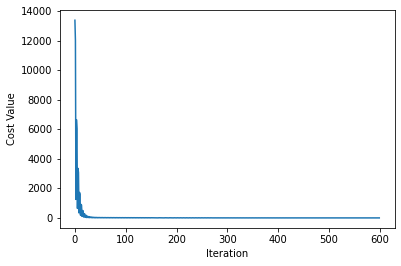

In [ ]:
plt.plot(range(len(CostList)),CostList)
plt.xlabel("Iteration")
plt.ylabel("Cost Value")
plt.show()

Stochastic Multi Gradient Descent

In [ ]:
df2 = pd.read_csv("MultipleLR.csv",names = ["X1","X2","X3","Y"])
df2.head()

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [ ]:
from sklearn.utils import shuffle
df2 = shuffle(df2)
df2.reset_index(inplace = True , drop=True)
df2.head()

,X1,X2,X3,Y
0,69,74,77,149
1,76,83,71,149
2,89,91,90,180
3,88,92,86,177
4,87,79,90,175


In [ ]:
def Stochastic_Gradient_Descent(df2,alpha):
  thetas = np.array([0,0,0,0],dtype = np.float64)
  df2.insert(loc = 0,column = "X0",value = 1)
  predictors= list(df2.iloc[:,:4].columns)
  CostList = []
  CostPrev = 0
  end = False
  for i in range(200):
    for j in range(df2.shape[0]):
      df2.loc[j,"Y_Predict"] = df2.loc[j,predictors].dot(thetas)
      Cost = ((df2.loc[j,"Y_Predict"] - df2.loc[j,"Y"])**2)/2   
      CostList.append(Cost)   
      GradientList= []
      for k in predictors:
        GradientList.append((df2.loc[j,"Y_Predict"]-df2.loc[j,"Y"])*df2.loc[j,k])
      thetas = thetas - alpha*np.array(GradientList)
    if abs(Cost - CostPrev)<0.001:
        end = True
    else:
      CostPrev = Cost   
    if end:
      break
  return CostList,thetas



In [ ]:
CostList,thetas = Stochastic_Gradient_Descent(df2,0.000001)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df2["Y"], df2["Y_Predict"]))

0.980240769184731


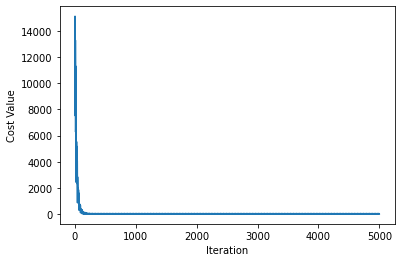

In [ ]:
plt.plot(range(len(CostList)),CostList)
plt.xlabel("Iteration")
plt.ylabel("Cost Value")
plt.show()